/tmp/ipykernel_5354/735136782.py:36: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x=x, y=y, hue=color_by, s=size, palette=palette, edgecolor="k")


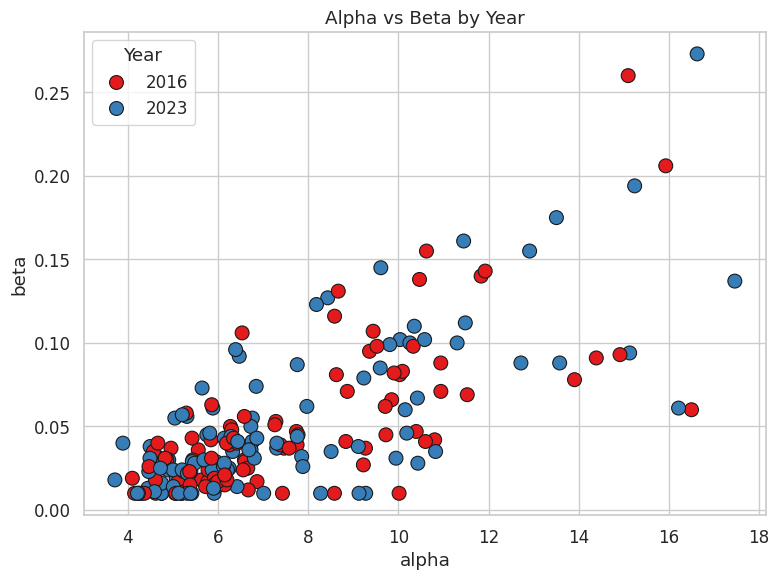

/tmp/ipykernel_5354/735136782.py:36: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x=x, y=y, hue=color_by, s=size, palette=palette, edgecolor="k")


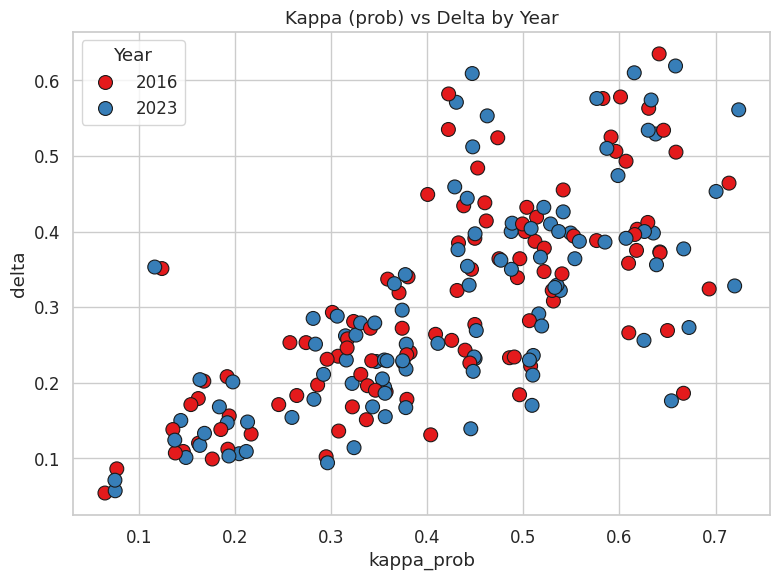

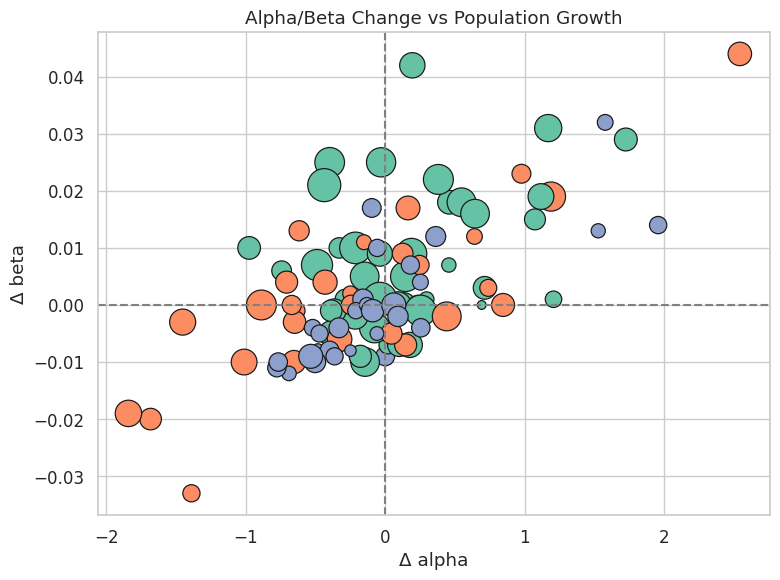

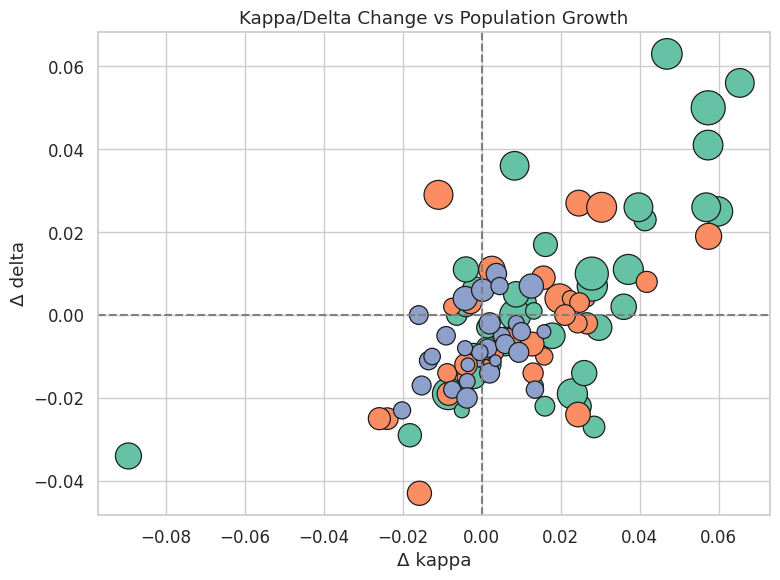

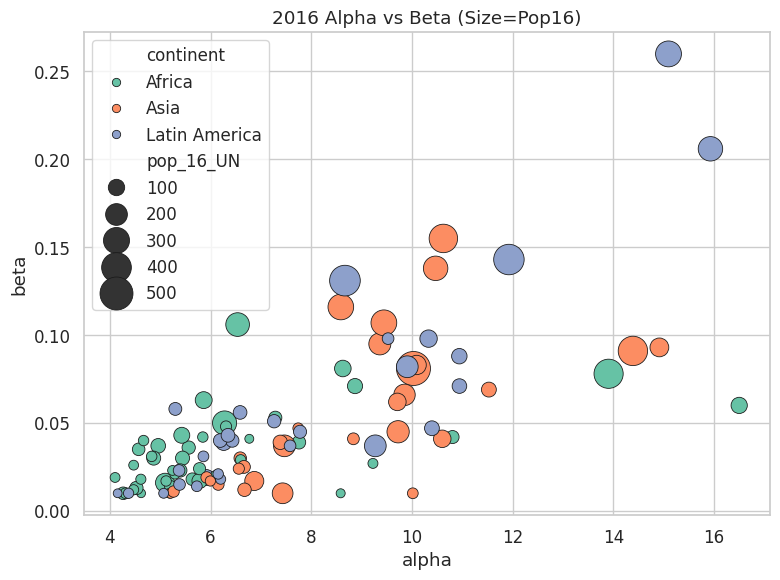

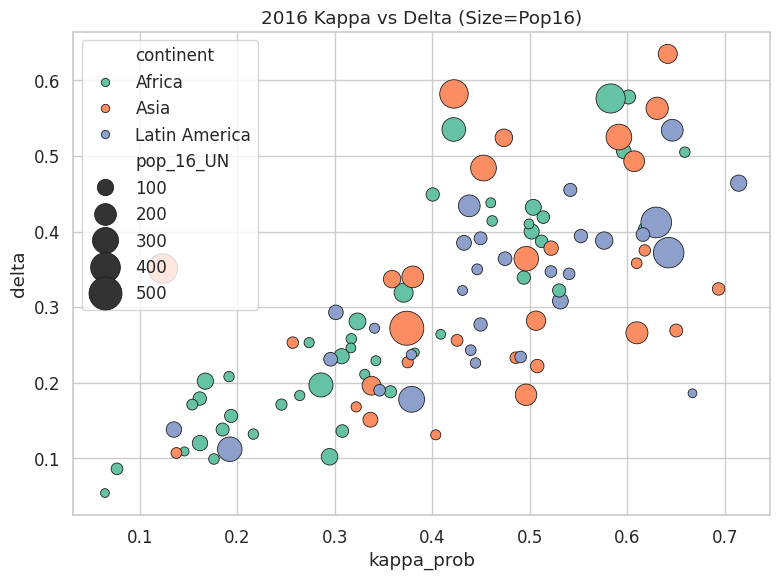

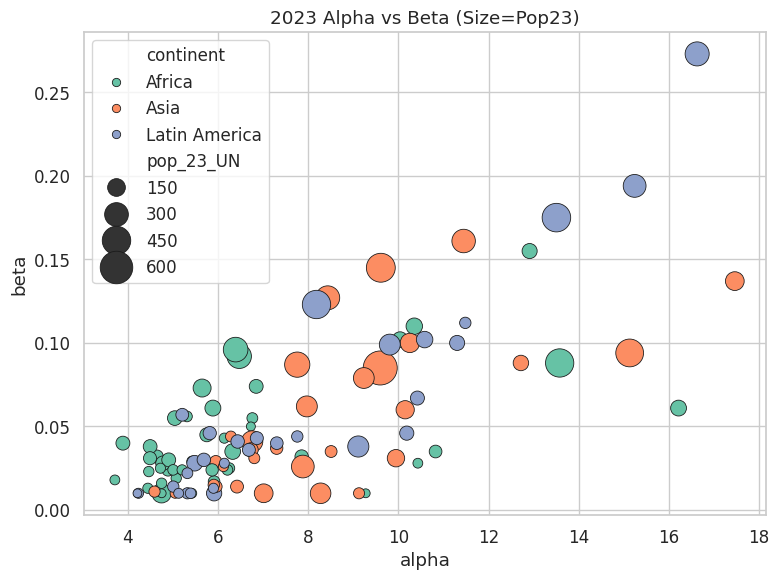

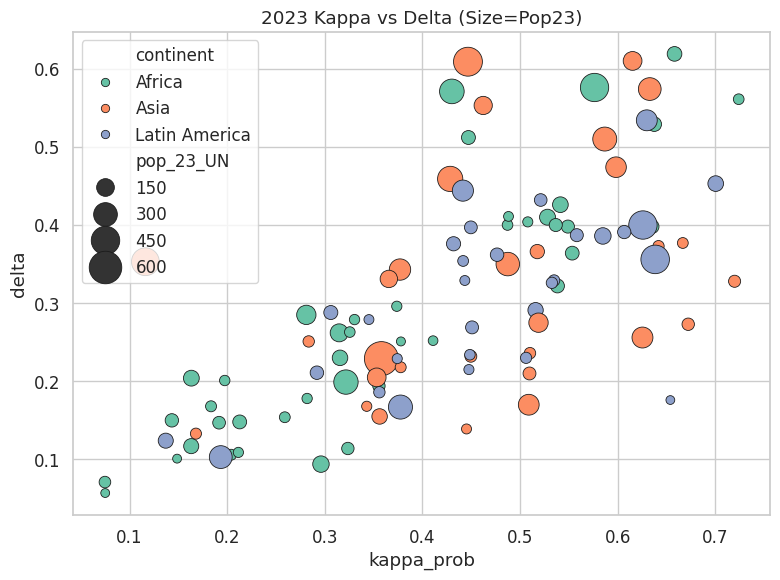

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置 Seaborn 样式
sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("Set1")

# 读取数据
area_df = pd.read_csv("area_remoteness_params.csv")
height_df = pd.read_csv("height_remoteness_params.csv")
cities_df = pd.read_csv("CitiesDB_new.csv")

# log-odds 转概率
area_df["kappa_prob"] = 1 / (1 + np.exp(-area_df["kappa"]))
area_df['delta'] = -1 * area_df['delta']

# 合并 area 和 height 参数
params_df = pd.merge(area_df, height_df, on=["City", "Year"])
params_df = pd.merge(params_df, cities_df, left_on="City", right_on="Name")

# 提取 2016 和 2023 年数据，方便计算差值
df_2016 = params_df[params_df["Year"] == 2016].set_index("City")
df_2023 = params_df[params_df["Year"] == 2023].set_index("City")

# 差值 DataFrame（2023 - 2016）
delta_df = df_2023[["alpha", "beta", "kappa_prob", "delta"]].copy()
delta_df[["delta_alpha", "delta_beta", "delta_kappa", "delta_delta"]] = df_2023[["alpha", "beta", "kappa_prob", "delta"]].values - df_2016[["alpha", "beta", "kappa_prob", "delta"]].values
delta_df["pop_growth"] = df_2023["pop_23_UN"] / df_2016["pop_16_UN"]
delta_df["continent"] = df_2023["continent"]

# 图1：年份分色图（alpha/beta 和 kappa/delta）
def plot_param_scatter(df, x, y, title, color_by="Year", size=100):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x, y=y, hue=color_by, s=size, palette=palette, edgecolor="k")
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=color_by)
    plt.tight_layout()
    plt.show()

plot_param_scatter(params_df, "alpha", "beta", "Alpha vs Beta by Year")
plot_param_scatter(params_df, "kappa_prob", "delta", "Kappa (prob) vs Delta by Year")

# 图2：参数变化图（按人口增长比例放大）
def plot_change_scatter(df, x, y, size_col, title):
    plt.figure(figsize=(8,6))
    sizes = df[size_col] * 300  # 控制点大小
    sns.scatterplot(x=df[x], y=df[y], size=sizes, hue=df["continent"], sizes=(40, 600), edgecolor="k", palette="Set2", legend=False)
    plt.axhline(0, color="gray", ls="--")
    plt.axvline(0, color="gray", ls="--")
    plt.title(title)
    plt.xlabel(f"Δ {x.split('_')[-1]}")
    plt.ylabel(f"Δ {y.split('_')[-1]}")
    plt.tight_layout()
    plt.show()

plot_change_scatter(delta_df, "delta_alpha", "delta_beta", "pop_growth", "Alpha/Beta Change vs Population Growth")
plot_change_scatter(delta_df, "delta_kappa", "delta_delta", "pop_growth", "Kappa/Delta Change vs Population Growth")

# 图3 & 图4：固定年份图，圆圈大小按人口，颜色按 continent
def plot_year_scatter(df, year, x, y, pop_col, title):
    data = df[df["Year"] == year]
    sizes = data[pop_col] / 50  # 缩小比例
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x=x, y=y, size=sizes, hue="continent", sizes=(40, 600), edgecolor="k", palette="Set2", legend=True)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

plot_year_scatter(params_df, 2016, "alpha", "beta", "pop_16_UN", "2016 Alpha vs Beta (Size=Pop16)")
plot_year_scatter(params_df, 2016, "kappa_prob", "delta", "pop_16_UN", "2016 Kappa vs Delta (Size=Pop16)")

plot_year_scatter(params_df, 2023, "alpha", "beta", "pop_23_UN", "2023 Alpha vs Beta (Size=Pop23)")
plot_year_scatter(params_df, 2023, "kappa_prob", "delta", "pop_23_UN", "2023 Kappa vs Delta (Size=Pop23)")
